# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

<div class="span5 alert alert-info">
### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet


#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution
</div>
****

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

In [2]:
#data = pd.io.stata.read_stata('us_job_market_discrimination.dta')

data = pd.io.stata.read_stata('C:\\Users\\binoop pulikkal\\us_job_market_discrimination.dta')

In [3]:
# number of callbacks for black-sounding names
sum(data[data.race=='w'].call)

235.0

In [ ]:
data.to_csv('d.csv',index=False)

In [4]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


<div class="span5 alert alert-success">
<p>Your answers to Q1 and Q2 here</p>
</div>

In [5]:
w = data[data.race=='w']['call']
b = data[data.race=='b']['call']

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Set default Seaborn style
sns.set()

In [7]:
data.groupby(['race'],as_index=False).agg({'call':[np.sum,np.size,np.mean]})

race   call                  
          sum    size      mean
0    b  157.0  2435.0  0.064476
1    w  235.0  2435.0  0.096509

In [8]:
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""
    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)
    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data,func)
    return bs_replicates

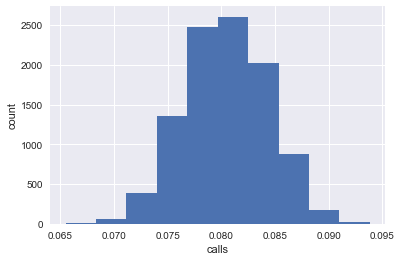

In [18]:
bs_replicates = draw_bs_reps(data['call'],np.mean,10000)

#plot 10,000 sample means
_ = plt.hist(bs_replicates)
# Label axes
_ = plt.xlabel('calls')
_ = plt.ylabel('count')
plt.show()

* Central limit theorom holds - as the plot of 10,000s ample means above looks like a normal distribution 
* Null hypothesis H0: The distribution of calls for white and black named resumes are identical (Alpha=0.05)
* Alternate hypothesis H1: The distribution of calls for white and black named resumes are not identical

In [14]:
# Your solution to Q3 here

In [10]:
#Bootstrap test

# Test statistic: difference of mean

empirical_diff_means = np.mean(w) - np.mean(b)

# Concatenate calls
calls_concat = np.concatenate((w,b))

# Initialize bootstrap replicates: bs_replicates
bs_replicates = np.empty(100000)

for i in range(10000):
    # Generate bootstrap sample
    bs_sample = np.random.choice(calls_concat, size=len(calls_concat))
    # Compute replicate
    bs_replicates[i] = np.mean(bs_sample[:len(w)]) - np.mean(bs_sample[len(b):])
    
# Compute and print p-value: p
p = np.sum(bs_replicates >=empirical_diff_means ) / len(bs_replicates)
print('p-value =', p)

p-value = 0.0


In [11]:
#Frequentist test
import scipy
scipy.stats.ttest_ind(w, b, equal_var=False)

Ttest_indResult(statistic=4.114705290861751, pvalue=3.942941513645935e-05)

* p values less than alpha from both tests above suggests that we can reject the null hypothesis. 
* The distribution of calls received is different between white and black names

In [19]:
print('95% confidence interval for the mean number of calls is ', np.percentile(bs_replicates,[2.5,97.5]))

95% confidence interval for the mean number of calls is  [0.07289527 0.08788501]


<div class="span5 alert alert-success">
<p> Your answers to Q4 and Q5 here </p>
</div>

* The sample data shows that about 6.5% of resumes with balck names receive calls, where as about 9.7% of resumes with white names receive interview calls
* We wanted to test if this difference is statistically significant or just by chance.
* We tested the hypothesis that both distribution of calls received by black & white named resumes are identical
* Test results suggested that the hypothesis can be rejected and there is a significant difference in number of calls receibed by black and white named resumes 

* At this point in time, we cant say whether race is the most important factor in getting an interview call. This require more analysis
* For example; as shown below, for educaiton categories 0 & 1 , it appeasrs that black names receive more calls than white names
* As shown below, it appears that black & white names received almost same number more calls from non-profit organizations
* As shown below, the data sample suggest that black names recived more calls within those resumes that have less than 4 years of experience
* We can find out how much each feature contribute to the call variable by using machine learning technique such as RandomForest

In [15]:
data.groupby(['race','education'],as_index=False).agg({'call':[np.sum,np.size,np.mean]})

race education   call                  
                    sum    size      mean
0    b         0    3.0    28.0  0.107143
1    b         1    2.0    22.0  0.090909
2    b         2    9.0   132.0  0.068182
3    b         3   29.0   493.0  0.058824
4    b         4  114.0  1760.0  0.064773
5    w         0    0.0    18.0  0.000000
6    w         1    1.0    18.0  0.055556
7    w         2   16.0   142.0  0.112676
8    w         3   55.0   513.0  0.107212
9    w         4  163.0  1744.0  0.093463

In [16]:
data.groupby(['race','ownership'],as_index=False).agg({'call':[np.sum,np.size,np.mean]})

race  ownership   call                  
                     sum    size      mean
0    b              70.0   996.0  0.070281
1    b  Nonprofit    8.0   159.0  0.050314
2    b    Private   67.0  1067.0  0.062793
3    b     Public   12.0   213.0  0.056338
4    w             107.0   996.0  0.107430
5    w  Nonprofit    9.0   159.0  0.056604
6    w    Private   95.0  1067.0  0.089035
7    w     Public   24.0   213.0  0.112676

In [17]:
data[data.yearsexp <4].groupby(['race'],as_index=False).agg({'call':[np.sum,np.size,np.mean]})

race  call                 
         sum   size      mean
0    b  18.0  291.0  0.061856
1    w  16.0  300.0  0.053333